##### NAME: ANBUSELVAN MAHALINGAM
##### SUBJECT: DSC 640 DATA PREENTATION AND VISUALIZATION - WEEK 1 & 2

In [17]:
# To Load the Files - User defind function to read the files.
import pandas as pd

def read_file(file_name):
    try:
        data_df = pd.read_excel(file_name)
        return data_df
    except:
        print(r"Unable to read the file :",file_name)

In [18]:
# To load the hotdog-contest-winners.xlsm file
hotdog_winners_df = read_file("hotdog-contest-winners.xlsm")
hotdog_winners_df.head(n=3)

,Year,Winner,Dogs eaten,Country,New record
0,1980,Paul Siederman & Joe Baldini,9.1,United States,0
1,1981,Thomas DeBerry,11.0,United States,0
2,1982,Steven Abrams,11.0,United States,0


In [19]:
# Simple EDA
hotdog_winners_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        31 non-null     int64  
 1   Winner      31 non-null     object 
 2   Dogs eaten  31 non-null     float64
 3   Country     31 non-null     object 
 4   New record  31 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.3+ KB


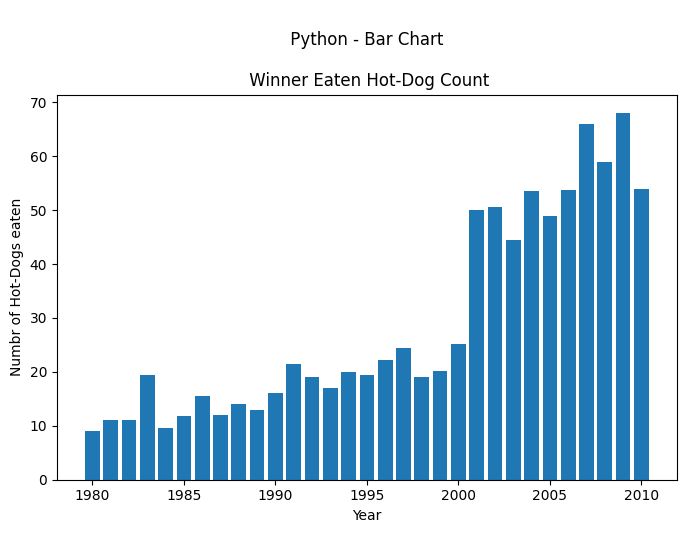

In [20]:
import matplotlib.pyplot as plt

# Bar Chart
x_values = hotdog_winners_df['Year']
y_values = hotdog_winners_df['Dogs eaten']

# To create bar chart
plt.figure(figsize=(8, 5))
plt.bar(x_values, y_values)

plt.title('\n Python - Bar Chart \n\n Winner Eaten Hot-Dog Count')
plt.xlabel('Year')
plt.ylabel('Numbr of Hot-Dogs eaten')

# Save the figure
plt.savefig('python-bar_chart.png', bbox_inches='tight')
plt.show()

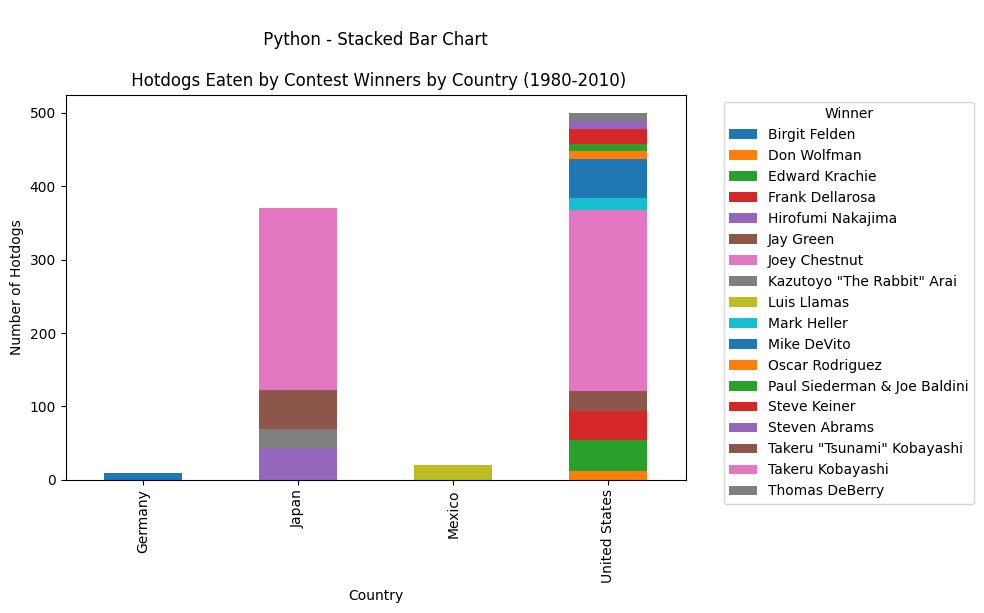

In [21]:
# stacked bar chart with countries and winners

# To pivot the data
pivot_df = hotdog_winners_df.pivot_table(values='Dogs eaten',
                                         index='Country',
                                         columns='Winner',
                                         aggfunc='sum',
                                         fill_value=0)
# To create stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('\n Python - Stacked Bar Chart \n\n Hotdogs Eaten by Contest Winners by Country (1980-2010)')
plt.xlabel('Country')
plt.ylabel('Number of Hotdogs')
plt.legend(title='Winner', bbox_to_anchor=(1.05, 1), loc='upper left')
# Save the figure
plt.savefig('python-stacked_bar_chart.png', bbox_inches='tight')
plt.show()

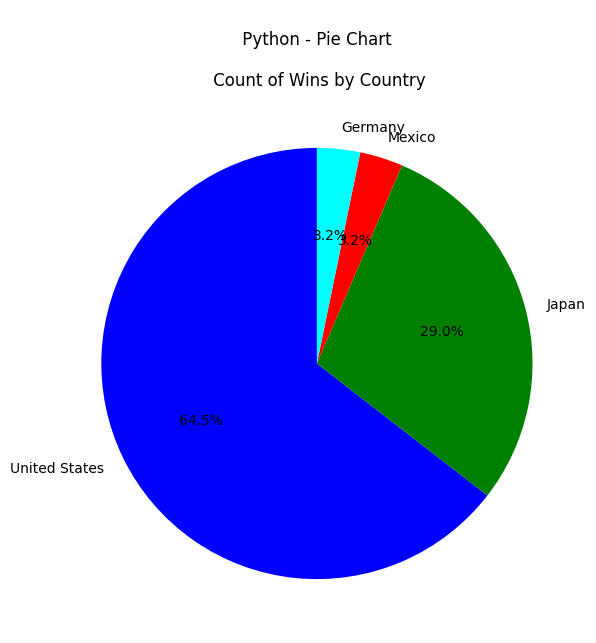

In [22]:
# Create the pie chart - By each winning countries

# To aggregate the data to count the number of wins for each country
wins_by_country = hotdog_winners_df['Country'].value_counts()

plt.figure(figsize=(10, 7))
wins_by_country.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['blue', 'green', 'red', 'cyan', 'magenta'])
plt.title('\n Python - Pie Chart \n\n Count of Wins by Country')
plt.ylabel('')  # Hides the y-label for a cleaner look
# Save the figure
plt.savefig('python-pie_chart.png', bbox_inches='tight')
plt.show()

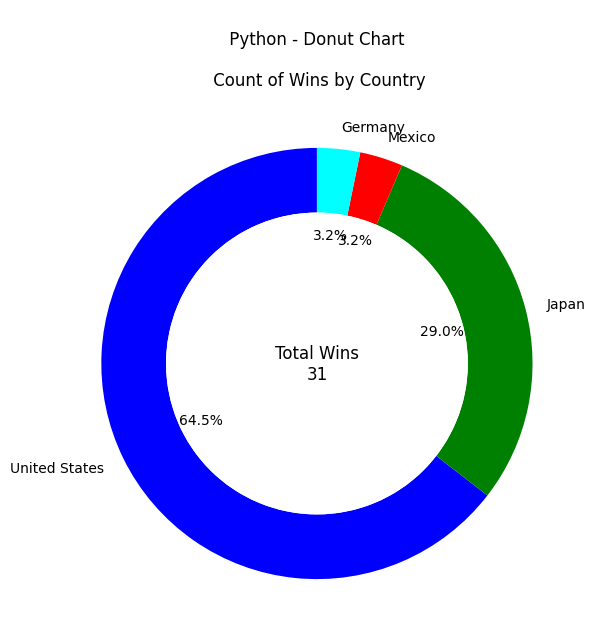

In [23]:
# Create the donut chart

# To aggregate the data to count the number of wins for each country
wins_by_country = hotdog_winners_df['Country'].value_counts()

# To create donut chart
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(wins_by_country,
                                  labels=wins_by_country.index,
                                  autopct='%1.1f%%', startangle=90,
                                  colors=['blue', 'green', 'red', 'cyan', 'magenta'],
                                  wedgeprops=dict(width=0.3)) # create hole in the middle

# Add information in the center of the donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
plt.text(0, 0, 'Total Wins\n{}'.format(sum(wins_by_country)), 
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=12)

plt.title('\n Python - Donut Chart \n\n Count of Wins by Country')
plt.ylabel('')  # Hides the y-label for a cleaner look
# Save the figure
plt.savefig('python-donut_chart.png', bbox_inches='tight')
plt.show()

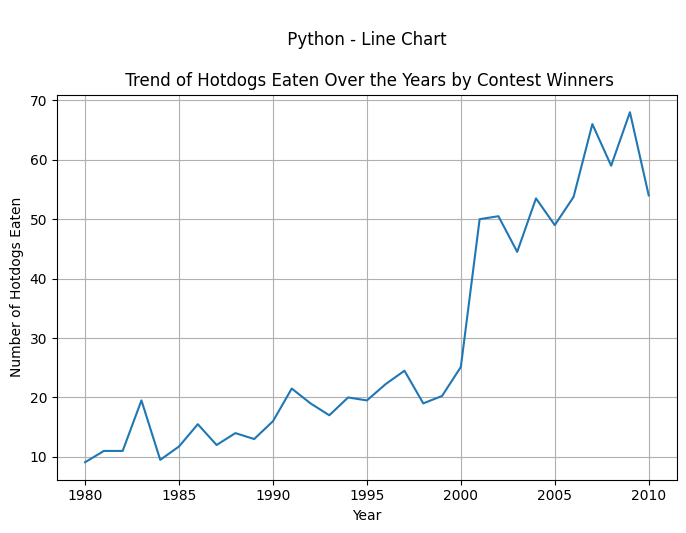

In [24]:
# Line chart to visualize the trend of hotdogs eaten over the years

# To pivot the data to have years as the index and winners as columns
pivot_df = hotdog_winners_df.pivot_table(values='Dogs eaten',
                                         index='Year',
                     
                                         aggfunc='sum', 
                                         fill_value=0)

# To  create line chart
plt.figure(figsize=(8, 5))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=column)

plt.title('\n Python - Line Chart \n\n Trend of Hotdogs Eaten Over the Years by Contest Winners')
plt.xlabel('Year')
plt.ylabel('Number of Hotdogs Eaten')
plt.grid(True)
# Save the figure
plt.savefig('python-line_chart.png', bbox_inches='tight')
plt.show()

In [ ]:
# To consolidate the Python,R and Tableau visualizations

from PIL import Image
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
import os

# Images are stored location
image_dir = r'C:\Users\anu18\Desktop\DSC-640\ex1-2\Image-files'
# List of image files
images = [
    'python-bar_chart.png', 'python-donut_chart.png', 'python-line_chart.png', 'python-pie_chart.png', 'python-stacked_bar_chart.png',
    'R-bar_chart.png', 'R-donut_chart.png', 'R-line_chart.png', 'R-pie_chart.png', 'R-stacked_bar_chart.png',
    'Tableau-BarChart.png', 'Tableau-DonutChart.png', 'Tableau-LineChart.png', 'Tableau-PieChart.png', 'Tableau-StackedBarChart.png'
]

# To reate a new PDF canvas
pdf_file = r'C:\Users\anu18\Desktop\DSC-640\ex1-2\Image-files\consolidated_visualizations.pdf'
c = canvas.Canvas(pdf_file, pagesize=letter)

# To define layout and dimensions
width, height = letter
img_width = width * 0.8  # 80% of the page width
img_height = height * 0.6  # 60% of the page height

# To set the titles 
titles = {
    'python': 'Python Visualizations',
    'R': 'R Visualizations',
    'Tableau': 'Tableau Visualizations'
}

# User dfined function to add images to the PDF
def add_images_to_pdf(images, c):
    for img_file in images:
        img_path = os.path.join(image_dir, img_file)
        img = Image.open(img_path)
        c.setFont("Helvetica-Bold", 14)
        
        category = img_file.split('-')[0]
        if category in titles:
            c.drawString(50, height - 50, titles[category])
            titles.pop(category)  # Remove the title once used
        
        # To calculate position to center the image
        x = (width - img_width) / 2
        y = (height - img_height) / 2

        # to resize and add image to the PDF
        img = img.resize((int(img_width), int(img_height)), Image.ANTIALIAS)
        temp_img_path = os.path.join(image_dir, f'temp_{img_file}')
        img.save(temp_img_path)
        c.drawImage(temp_img_path, x, y, width=img_width, height=img_height)
        c.showPage()

        # To remove the temporary image file
        os.remove(temp_img_path)

# To add all images to the PDF
add_images_to_pdf(images, c)

# to save the PDF
c.save()

print(f'PDF saved as {pdf_file}')